In [ ]:
# Reset environment for a new run
% reset -f

# Load Libraries
from os.path import join # for joining file pathnames
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Bellow is presented a simple linear regression model, the model goal is to fit a simple straight line. Your loss stubbornly refuses to decrease!

Figure out why the training is not converging, fix it and explain what you have done. 


Text(0, 0.5, 'Label')

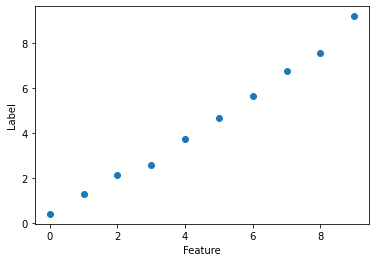

In [ ]:
features = np.array(range(10))
features = features[:, np.newaxis]

# Create labels by adding noise distributed around 0
labels = features + np.random.random(size=[10,1]) - 0.5

# Visualize the data
plt.scatter(features,labels)
plt.xlabel("Feature")
plt.ylabel("Label")

In [ ]:
features

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
labels

array([[0.40397819],
       [1.28394109],
       [2.11742344],
       [2.57920997],
       [3.74350921],
       [4.67871316],
       [5.67049306],
       [6.77207548],
       [7.56466907],
       [9.2003338 ]])

In [ ]:
# Delete any existing assignment to "model"
model = None

# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,             # 1 neuron
                             activation='tanh',   # 'tanh'
                             input_dim=1,
    bias_initializer='zeros'))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse',
             )

print(model.summary())

his = model.fit(x=features,
          y=labels,
          epochs=10,    # train for 10 epochs
          batch_size=10,# use 10 examples per batch
          verbose=1)    # verbose=1 prints progress per epoch
#Making predictions to plot
test = model.predict(features)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1/1 [==============================] - 0s 213ms/step - loss: 36.4654
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 36.4652
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 36.4650
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 36.4648
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 36.4646
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 36.4644
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 36.4641
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 36.4639
Epoch 9/10
1/1 [=====

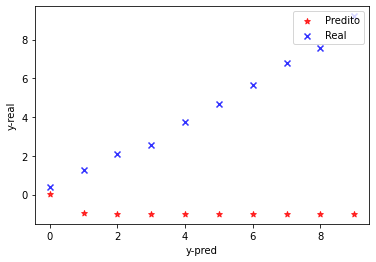

In [ ]:
import matplotlib.pyplot as plt
#Function to plot the graphs given the real and predicted
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_pred)), y_pred, color='red', marker='*', alpha=0.8, label= "Predito")
    plt.scatter(range(len(y_test)), y_test, color='blue',marker='x', alpha=0.8, label= "Real")
    plt.ylabel('y-real')
    plt.xlabel('y-pred')
    plt.legend(loc='upper right')
    plt.show()
    return
plotGraph(labels, test)

In [ ]:
labels

array([[0.40397819],
       [1.28394109],
       [2.11742344],
       [2.57920997],
       [3.74350921],
       [4.67871316],
       [5.67049306],
       [6.77207548],
       [7.56466907],
       [9.2003338 ]])

In [ ]:
test

array([[ 0.01000002],
       [-0.93297666],
       [-0.9976458 ],
       [-0.99991995],
       [-0.9999972 ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ],
       [-1.        ]], dtype=float32)

Como podemos notar no gráfico os resultados estão entre -1 e 1. Isto é porque a função usada para ativação, no caso tanh, retorna o output entre estes valores. Com isso é preciso normalizar os valores antes de aplicar o modelo.
Vamos prosseguir testando uma normalização para a faixa de -1 e 1.

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


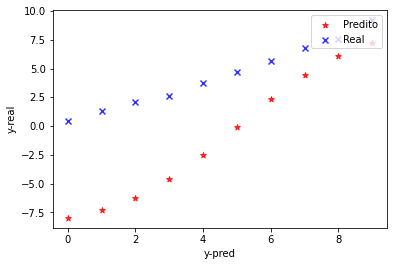

In [ ]:
# Delete any existing assignment to "model"
model = None
# Setting the scaler min max in the range [0,1]
scaler_in = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_out = preprocessing.MinMaxScaler(feature_range=(-1, 1))
# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,             # 1 neuron
                             activation='tanh',   # 'tanh'
                             input_dim=1,
    bias_initializer='ones'))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse', 
             )

print(model.summary())
#Aplying normalization to the initial target and input 
labels_norm = scaler_out.fit_transform(labels)
features_norm = scaler_in.fit_transform(features)
his = model.fit(x=features_norm,
          y=labels_norm,
          epochs=10000,    # train for 10 epochs
          batch_size=10,# use 10 examples per batch
          verbose=0)    # verbose=1 prints progress per epoch
#Making predictions to plot
test_norm = model.predict(features_norm)
test = scaler_in.inverse_transform(test_norm)
plotGraph(labels, test)

Temos uma convergência mas ainda não é o que se espera de performance.
Asseguir trocaremos a função de ativação e um novo teste será feito.

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


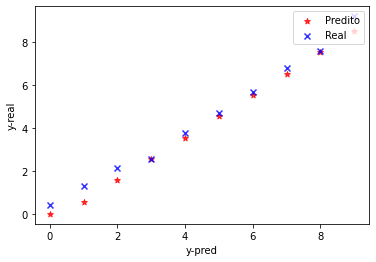

In [ ]:
# Delete any existing assignment to "model"
model = None
# Setting the scaler min max in the range [0,1]
scaler_in = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_out = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,             # 1 neuron
                             activation='relu',   # 'tanh'
                             input_dim=1,
    bias_initializer='ones'))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse', 
             )

print(model.summary())
#Aplying normalization to the initial target and input 
labels_norm = scaler_out.fit_transform(labels)
features_norm = scaler_in.fit_transform(features)
his = model.fit(x=features_norm,
          y=labels_norm,
          epochs=10000,    # train for 10 epochs
          batch_size=10,# use 10 examples per batch
          verbose=0)    # verbose=1 prints progress per epoch
#Making predictions to plot
test_norm = model.predict(features_norm)
test = scaler_in.inverse_transform(test_norm)
plotGraph(labels, test)

Com isso temos uma performance mais adequada.

Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


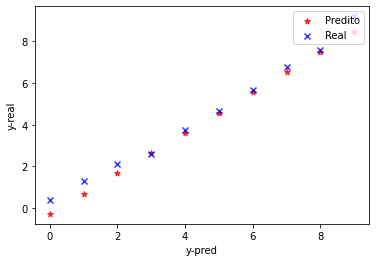

In [ ]:
# Delete any existing assignment to "model"
model = None
# Setting the scaler min max in the range [0,1]
scaler_in = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_out = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units=1,   # 1 neuron
                             input_dim=1,
    bias_initializer='ones'))         # number of feature cols=1

# Model calculates loss using mean-square error (MSE)
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse', 
             )

print(model.summary())
#Aplying normalization to the initial target and input 
labels_norm = scaler_out.fit_transform(labels)
features_norm = scaler_in.fit_transform(features)
his = model.fit(x=features_norm,
          y=labels_norm,
          epochs=10000,    # train for 10 epochs
          batch_size=10,# use 10 examples per batch
          verbose=0)    # verbose=1 prints progress per epoch
#Making predictions to plot
test_norm = model.predict(features_norm)
test = scaler_in.inverse_transform(test_norm)
plotGraph(labels, test)

Nesse caso nao precisaria usar uma função de ativação.

Explain clearly, in this text box, what you did to make the model learn the data representation.